# MNIST - MLP - Handwitten digits classification
First an aux function to load the database

In [1]:
import os
import struct
import numpy as np
import gzip
 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte.gz' % kind)
        
    with gzip.open(labels_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels


## Load train and test bases

In [2]:
X_train, y_train = load_mnist('mnist/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
X_test, y_test = load_mnist('mnist/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


## Plot some examples in this base
First one for each digit, then some example of the number 7 only

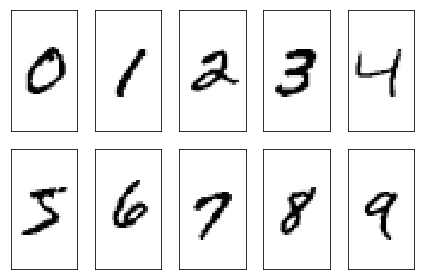

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

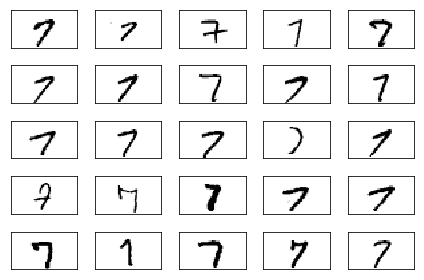

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()


## Create the model and train it

In [7]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(100,),
                   activation='relu',
                   solver='adam', alpha=0.0001,
                   batch_size='auto', learning_rate='constant',
                   learning_rate_init=0.001, max_iter=200,
                   shuffle=True, tol=0.0001, verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 2.53193570
Iteration 2, loss = 0.72367449
Iteration 3, loss = 0.43598218
Iteration 4, loss = 0.32789156
Iteration 5, loss = 0.26705275
Iteration 6, loss = 0.22812803
Iteration 7, loss = 0.18948864
Iteration 8, loss = 0.17177551
Iteration 9, loss = 0.15446131
Iteration 10, loss = 0.14211904
Iteration 11, loss = 0.13283876
Iteration 12, loss = 0.13170444
Iteration 13, loss = 0.12642326
Iteration 14, loss = 0.11370073
Iteration 15, loss = 0.11408186
Iteration 16, loss = 0.10846051
Iteration 17, loss = 0.10370602
Iteration 18, loss = 0.10016079
Iteration 19, loss = 0.09662952
Iteration 20, loss = 0.09805937
Iteration 21, loss = 0.09823469
Iteration 22, loss = 0.09053757
Iteration 23, loss = 0.08129420
Iteration 24, loss = 0.08080506
Iteration 25, loss = 0.08841703
Iteration 26, loss = 0.08337507
Iteration 27, loss = 0.07136408
Iteration 28, loss = 0.07691766
Iteration 29, loss = 0.06946308
Iteration 30, loss = 0.06965782
Iteration 31, loss = 0.06558731
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

## Plot the loss curve and display the accuracy on train and test sets

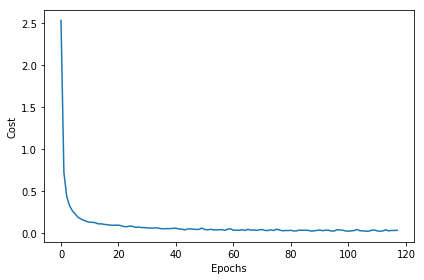

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(len(model.loss_curve_)), model.loss_curve_)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

In [18]:
import sys

y_train_pred = model.predict(X_train)

acc = ((np.sum(y_train == y_train_pred, axis=0)).astype('float') /
           X_train.shape[0])

print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 99.34%


In [17]:
y_test_pred = model.predict(X_test)

acc = ((np.sum(y_test == y_test_pred, axis=0)).astype('float') /
           X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

Test accuracy: 96.40%


## Display some errors

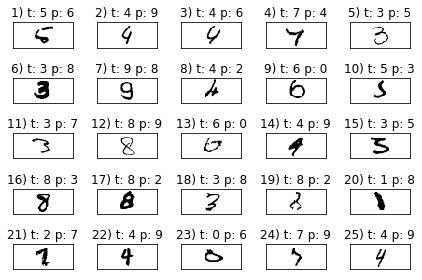

In [14]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()
